In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
os.listdir('./data/raw')

['submission_history.csv', 'band_content.csv', 'influencer_content.csv']

In [3]:
sub = pd.read_csv('./data/raw/submission_history.csv')
band = pd.read_csv('./data/raw/band_content.csv')
content = pd.read_csv('./data/raw/influencer_content.csv')

In [4]:
print(sub.shape, band.shape, content.shape)

(83706, 10) (9502, 75) (1073, 77)


# Subs

In [5]:
sub.head(10)

,id,pk,track_id,track_info,band_id,influencer_id,influencer_kind,influencer_feedback,decision,score
0,7312,7312,324,test tim,303,102,Label,"Bonjour, \nle track surf sur les codes ""austra...",['give feedback on your tune'],0.0
1,7313,7313,324,test tim,303,103,Radio,"Bonjour, merci pour votre envoi. Le morceau n'...",['give feedback on your tune'],0.0
2,7314,7314,324,test tim,303,104,Journalist,Le morceau est à lui tout seul une succession ...,['give feedback on your tune'],0.0
3,7315,7315,324,test tim,303,105,Channel,Très bonne pop aux airs de Tame Impala et Pond...,"['share it on social media', 'add it to a play...",1.0
4,7316,7316,324,test tim,303,106,Media,"La production est assurément excellente, mais ...",['give feedback on your tune'],0.0
5,7320,7320,324,test tim,303,110,Media,Un certain aspect rétro que l'on dirait par mo...,['add it to a playlist'],1.0
6,7322,7322,324,test tim,303,112,Playlist,Yeah ! Love this !,['add it to a playlist'],1.0
7,7323,7323,324,test tim,303,113,Playlist,"Hello, le morceau est sympa et en totale adéqu...",['give feedback on your tune'],0.0
8,7324,7324,324,test tim,303,114,Media,"Premièrement, le clip est original et sympa à ...",['give feedback on your tune'],0.0
9,7326,7326,324,test tim,303,116,Label,"C'est un beau projet qui a du potentiel, mais ...",['give feedback on your tune'],0.0


In [6]:
sub.influencer_feedback[2]

"Le morceau est à lui tout seul une succession de surprises instrumentales, à l'image de ce qu'est le groupe. Je recommanderais d'aller les voir en concert pour vivre un festival de saveurs en une soirée. Ca tombe bien, c'est pour bientôt. N'hésitez pas à m'en dire plus par mail."

In [7]:
sub.influencer_feedback[4]

"La production est assurément excellente, mais le style de musique représenté ne s'inscrit pas dans la line up de Still in Rock. Quid des radios indie ?"

In [8]:
sub.influencer_feedback[7]

'Hello, le morceau est sympa et en totale adéquation avec le temps des derniers jours! \nJ\'aime beaucoup la prod. sur la voix et les guitares. J\'aime moins la rythmique, surtout la batterie qui est pour moi le point faible du morceau, ce qui est dommage. Le côté disco trop "rigide" et entendu... Un peu plus de folie? \nPar moment le son de la basse ne me satisfait pas totalement non plus. \nPeut-être il manque un peu de claviers ?\nDu coup  même si je trouve le morceau plutôt cool je ne vais pas pouvoir lui trouver une place dans une de mes prochaines playlists, mais je vais bien sûr rester attentif et vous suivre ! Dans le paysage actuel vous avez tout à fait votre place ! Alors a très bientôt !'

In [9]:
sub.influencer_kind.value_counts()

Media          35288
Radio           9872
Label           9155
Playlist        8501
Journalist      4268
Channel         4150
Booker          3405
Mentor          2288
Manager         2094
Springboard     2087
Publisher       1698
Supervisor       572
Event            328
Name: influencer_kind, dtype: int64

In [10]:
sub.score.value_counts()

0.00    53543
1.00    17115
0.25    10920
0.50     2128
Name: score, dtype: int64

In [11]:
sub.score.describe()

count    83706.000000
mean         0.249791
std          0.395703
min          0.000000
25%          0.000000
50%          0.000000
75%          0.250000
max          1.000000
Name: score, dtype: float64

In [12]:
sub.track_info.value_counts()

"L'Orage est passé" est le titre phare de mon EP " A la Surface". Sortie de "L'Orage est passé" en clip sur Youtube : 11 septembre 2019. Le clip a été tourné par mes 3 amis les plus proches. Sortie officielle de mon EP-5 titres : 1er octobre 2019.Concert de sortie d'EP : 3 octobre 2019 au Café de la Danse (Paris). Voici en vidéo le TEASER de mon EP, qui contient 5 extraits de chaque titre composant l'EP filmés et enregistrés dans leur version entièrement acoustique pendant la séance d'enregistrement de mon EP au Studio Aeronef. Il est sorti il y a 2 mois sur YOUTUBE: https://www.youtube.com/watch?v=2KBnh10EhUgL'Orage est passé: Paul Barreyre : chant, guitare, textes, musique, arrangementsCamille El Bacha :  création électronique, piano préparéSeddam Novruzbayov : zurna, dudukMilàn Tabak : batterieMatthias Courbaud : contrebasseDafné Kritharas : 2èmes voix, direction artistique, direction de productionAntoine Karacostas : ingénieur du son, mixage.                                        

In [70]:
sub.track_info.fillna('NAN').apply(lambda x: ' I ' in x or ' music ' in x or ' is ' in x).sum()

15745

In [66]:
sub.shape

(83706, 10)

In [13]:
sub.decision.value_counts()

['give feedback on your tune']                                                                                                                                                                                             51713
['give feedback on your tune', 'allows you to give a reply to this feedback']                                                                                                                                               5128
['allows you to give a reply to this feedback', 'give feedback on your tune']                                                                                                                                               4886
['add it to a playlist']                                                                                                                                                                                                    4292
['write a wise advice']                                                                             

In [14]:
sub.id.nunique()

83706

In [15]:
sub.band_id.nunique()

4452

In [16]:
sub.track_id.nunique()

8240

In [17]:
sub.influencer_id.nunique()

596

In [18]:
sub.groupby('track_id').influencer_id.nunique().describe()

count    8240.000000
mean       10.094660
std        14.085085
min         1.000000
25%         2.000000
50%         5.000000
75%        12.000000
max       194.000000
Name: influencer_id, dtype: float64

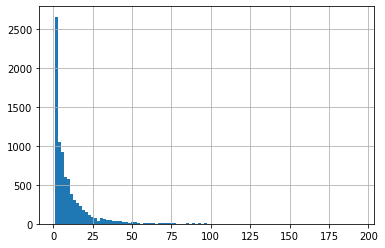

In [19]:
sub.groupby('track_id').influencer_id.nunique().hist(bins=100)

In [20]:
sub.groupby('band_id').influencer_id.nunique().describe()

count    4452.000000
mean       16.578616
std        20.955760
min         1.000000
25%         4.000000
50%        10.000000
75%        21.000000
max       206.000000
Name: influencer_id, dtype: float64

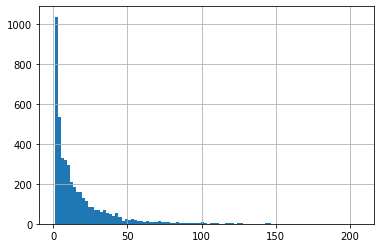

In [21]:
sub.groupby('band_id').influencer_id.nunique().hist(bins=100)

In [22]:
sub.groupby('influencer_id').track_id.nunique().describe()

count     596.000000
mean      139.563758
std       208.951221
min         1.000000
25%        19.000000
50%        59.000000
75%       174.250000
max      1968.000000
Name: track_id, dtype: float64

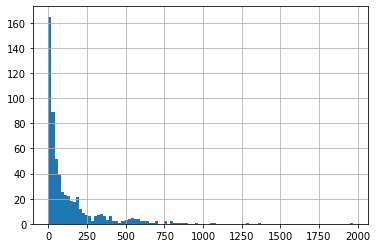

In [23]:
sub.groupby('influencer_id').track_id.nunique().hist(bins=100)

# Bands

In [24]:
band.shape

(9502, 75)

In [25]:
band.head(10)

,id,band_id,biography_fr,biography_en,Acid house,African music,Alternative rock,Ambient,Blues,Bossa Nova,...,Singer-songwriter,Soul,Surf rock,Synthpop,Synthwave,Techno,Traditional Music,Trap,Trip hop,Variété Française
0,303,303,"Pop, Dance, Confettis, Truite, Citron, Hommes ...","Pop, Dance, Confetti, Trout, Lemon, Hooded Nud...",0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,311,311,NaN,NaN,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,314,314,"La vie en jaune ! GAUMAR, révélation pop du ha...",NaN,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,315,315,"Créé en 2016, VAGUES est un groupe de rock qui...",NaN,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,316,316,Étroit passage menant à la porte de vos rêves ...,NaN,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,317,317,"Explorer, rechercher. Partir en voyage, loin. ...",NaN,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,318,318,NaN,NaN,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,319,319,"Aux frontières du Hip-Hop, du Jazz et des musi...",NaN,0,0,1,0,0,0,...,0,1,1,0,0,0,0,0,0,0
8,320,320,"Dans leur nom, il y a des battements d’ailes e...",NaN,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,322,322,"Nouveau groupe parisien/normand. 1er EP ""Lands...",NaN,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [26]:
band.isnull().sum()

id                      0
band_id                 0
biography_fr         6161
biography_en         7281
Acid house              0
                     ... 
Techno                  0
Traditional Music       0
Trap                    0
Trip hop                0
Variété Française       0
Length: 75, dtype: int64

In [27]:
band.isnull().sum().value_counts()

0       73
7281     1
6161     1
dtype: int64

# Content

In [28]:
content.head(10)

,id,influencer_id,description_fr,description_en,preferences_fr,preferences_en,Acid house,African music,Alternative rock,Ambient,...,Singer-songwriter,Soul,Surf rock,Synthpop,Synthwave,Techno,Traditional Music,Trap,Trip hop,Variété Française
0,96,96,"Ex-BSC NEWS, nouveau magazine culturel franc-t...","Ex-BSC NEWS, nouveau magazine culturel franc-t...",Musique Comtemporaine et Jazz,NaN,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
1,97,97,Underdog Records is a french alternative label...,Underdog Records is a french alternative label...,"Folk, soul, blues, rock&roll, indie pop","Folk, soul, blues, rock&roll, indie pop",0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
2,102,102,HIGHLIFE is a music publishing company + Indep...,HIGHLIFE Recordings has a wide open philosophy...,Déjà de la maturité,Already mature and original,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
3,103,103,Nectar est une émission radio musicale et hebd...,Nectar is a weekly music radio program about f...,Folk,Folk,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,104,104,Ecrit pour Konbini et Noisey (Vice). Défricheu...,"Writes for Konbini and Noisey (Vice). Rap, Hip...",Rap,Rap,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
5,105,105,"Méloman, c'est la 1ère chaîne française entièr...",Méloman is the first French channel dedicated ...,Pop,Pop,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
6,106,106,Brooklyn-based magazine. Chroniques indépendan...,Brooklyn-based magazine. Chroniques indépendan...,Garage,Garage,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
7,107,107,Electro Posé - Inside Your Minds ◆ Deep House ...,Electro Posé - Inside Your Minds ◆ Deep House ...,Chillwave,Chillwave,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0
8,108,108,Rejoignez Sound of Brit où le meilleur (et le ...,Rejoignez Sound of Brit où le meilleur (et le ...,100% Artistes anglais et irlandais,100% English and Irish artists,0,0,1,0,...,1,0,1,1,0,1,0,0,0,0
9,109,109,Mensuel culturel en ligne. Rédigé par 90 lycée...,Mensuel culturel en ligne. Rédigé par 90 lycée...,NaN,NaN,0,0,1,1,...,0,0,0,1,1,1,0,0,0,1


In [29]:
content.shape

(1073, 77)

In [30]:
content.isnull().sum()

id                     0
influencer_id          0
description_fr       219
description_en       241
preferences_fr       311
                    ... 
Techno                 0
Traditional Music      0
Trap                   0
Trip hop               0
Variété Française      0
Length: 77, dtype: int64

In [31]:
content.head()

,id,influencer_id,description_fr,description_en,preferences_fr,preferences_en,Acid house,African music,Alternative rock,Ambient,...,Singer-songwriter,Soul,Surf rock,Synthpop,Synthwave,Techno,Traditional Music,Trap,Trip hop,Variété Française
0,96,96,"Ex-BSC NEWS, nouveau magazine culturel franc-t...","Ex-BSC NEWS, nouveau magazine culturel franc-t...",Musique Comtemporaine et Jazz,NaN,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
1,97,97,Underdog Records is a french alternative label...,Underdog Records is a french alternative label...,"Folk, soul, blues, rock&roll, indie pop","Folk, soul, blues, rock&roll, indie pop",0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
2,102,102,HIGHLIFE is a music publishing company + Indep...,HIGHLIFE Recordings has a wide open philosophy...,Déjà de la maturité,Already mature and original,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
3,103,103,Nectar est une émission radio musicale et hebd...,Nectar is a weekly music radio program about f...,Folk,Folk,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,104,104,Ecrit pour Konbini et Noisey (Vice). Défricheu...,"Writes for Konbini and Noisey (Vice). Rap, Hip...",Rap,Rap,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1


# Explore text data

In [38]:
band[['biography_fr', 'biography_en']].isnull().sum()

biography_fr    6161
biography_en    7281
dtype: int64

In [39]:
band[['biography_fr', 'biography_en']].head()

,biography_fr,biography_en
0,"Pop, Dance, Confettis, Truite, Citron, Hommes ...","Pop, Dance, Confetti, Trout, Lemon, Hooded Nud..."
1,NaN,NaN
2,"La vie en jaune ! GAUMAR, révélation pop du ha...",NaN
3,"Créé en 2016, VAGUES est un groupe de rock qui...",NaN
4,Étroit passage menant à la porte de vos rêves ...,NaN


In [40]:
band.head()

,id,band_id,biography_fr,biography_en,Acid house,African music,Alternative rock,Ambient,Blues,Bossa Nova,...,Singer-songwriter,Soul,Surf rock,Synthpop,Synthwave,Techno,Traditional Music,Trap,Trip hop,Variété Française
0,303,303,"Pop, Dance, Confettis, Truite, Citron, Hommes ...","Pop, Dance, Confetti, Trout, Lemon, Hooded Nud...",0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,311,311,NaN,NaN,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,314,314,"La vie en jaune ! GAUMAR, révélation pop du ha...",NaN,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,315,315,"Créé en 2016, VAGUES est un groupe de rock qui...",NaN,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,316,316,Étroit passage menant à la porte de vos rêves ...,NaN,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [43]:
content.head()

,id,influencer_id,description_fr,description_en,preferences_fr,preferences_en,Acid house,African music,Alternative rock,Ambient,...,Singer-songwriter,Soul,Surf rock,Synthpop,Synthwave,Techno,Traditional Music,Trap,Trip hop,Variété Française
0,96,96,"Ex-BSC NEWS, nouveau magazine culturel franc-t...","Ex-BSC NEWS, nouveau magazine culturel franc-t...",Musique Comtemporaine et Jazz,NaN,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
1,97,97,Underdog Records is a french alternative label...,Underdog Records is a french alternative label...,"Folk, soul, blues, rock&roll, indie pop","Folk, soul, blues, rock&roll, indie pop",0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
2,102,102,HIGHLIFE is a music publishing company + Indep...,HIGHLIFE Recordings has a wide open philosophy...,Déjà de la maturité,Already mature and original,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
3,103,103,Nectar est une émission radio musicale et hebd...,Nectar is a weekly music radio program about f...,Folk,Folk,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,104,104,Ecrit pour Konbini et Noisey (Vice). Défricheu...,"Writes for Konbini and Noisey (Vice). Rap, Hip...",Rap,Rap,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1


In [47]:
content[['description_fr', 'description_en', 'preferences_fr', 'preferences_en']].isnull().sum()

description_fr    219
description_en    241
preferences_fr    311
preferences_en    338
dtype: int64

In [48]:
content.shape

(1073, 77)

In [57]:
docs = content['preferences_fr'].fillna('Unknown')

In [58]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# prepare tokenizer
t = Tokenizer()
t.fit_on_texts(docs)
vocab_size = len(t.word_index) + 1
# integer encode the documents
encoded_docs = t.texts_to_sequences(docs)
print(encoded_docs)
# pad documents to a max length of 4 words
max_length = 4
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs)

[[11, 314, 7, 22], [43, 39, 113, 4, 315, 17, 2], [216, 3, 23, 316], [43], [12], [2], [138], [317], [63, 5, 58, 7, 318], [1], [319, 217, 7, 23, 320], [86, 114], [19], [166], [11, 32], [1], [87, 3, 321], [17, 322], [167, 51, 323], [1], [19], [1], [11, 32], [52, 218], [32], [219, 168], [11, 32, 53, 88, 115], [4, 53, 88, 115, 324, 3, 139], [48, 2], [2], [17], [9, 116], [6, 24], [44], [6, 24, 2], [138, 4], [5, 8, 220, 14, 221, 7, 140, 325], [17, 4, 7, 117], [44], [17, 2], [1], [17], [5, 326, 89, 68, 327, 14, 169], [1], [328, 141], [118, 2, 29, 90], [1], [6, 24], [1], [25, 40], [1], [1], [1], [1], [5, 38, 59, 222], [1], [6, 24, 69], [1], [1], [1], [329, 89, 330, 331, 8, 332, 33, 333, 334, 335, 91, 336, 3, 337, 41, 338, 339, 23, 223, 3, 340, 341, 342, 343, 344, 30, 345, 3, 346, 92, 347], [119, 10], [5, 38, 2, 7, 348], [6, 21], [142, 141], [5, 349, 350], [32], [120, 121, 5, 93], [351, 122], [1], [1], [352, 353, 216, 224, 70, 31, 354, 355], [1], [119, 5], [119, 71, 94, 356, 35, 12, 53, 72, 8, 2

In [60]:
docs

0                      Musique Comtemporaine et Jazz
1            Folk, soul, blues, rock&roll, indie pop
2                                Déjà de la maturité
3                                               Folk
4                                                Rap
                            ...                     
1068                                     En Français
1069     Musique faite par des artistes Réunionnais.
1070    Top line parfaite, chant maitrisé et lyrics 
1071                                         Unknown
1072                Émotions musicales et textuelles
Name: preferences_fr, Length: 1073, dtype: object

In [59]:
encoded_docs

[[11, 314, 7, 22],
 [43, 39, 113, 4, 315, 17, 2],
 [216, 3, 23, 316],
 [43],
 [12],
 [2],
 [138],
 [317],
 [63, 5, 58, 7, 318],
 [1],
 [319, 217, 7, 23, 320],
 [86, 114],
 [19],
 [166],
 [11, 32],
 [1],
 [87, 3, 321],
 [17, 322],
 [167, 51, 323],
 [1],
 [19],
 [1],
 [11, 32],
 [52, 218],
 [32],
 [219, 168],
 [11, 32, 53, 88, 115],
 [4, 53, 88, 115, 324, 3, 139],
 [48, 2],
 [2],
 [17],
 [9, 116],
 [6, 24],
 [44],
 [6, 24, 2],
 [138, 4],
 [5, 8, 220, 14, 221, 7, 140, 325],
 [17, 4, 7, 117],
 [44],
 [17, 2],
 [1],
 [17],
 [5, 326, 89, 68, 327, 14, 169],
 [1],
 [328, 141],
 [118, 2, 29, 90],
 [1],
 [6, 24],
 [1],
 [25, 40],
 [1],
 [1],
 [1],
 [1],
 [5, 38, 59, 222],
 [1],
 [6, 24, 69],
 [1],
 [1],
 [1],
 [329,
  89,
  330,
  331,
  8,
  332,
  33,
  333,
  334,
  335,
  91,
  336,
  3,
  337,
  41,
  338,
  339,
  23,
  223,
  3,
  340,
  341,
  342,
  343,
  344,
  30,
  345,
  3,
  346,
  92,
  347],
 [119, 10],
 [5, 38, 2, 7, 348],
 [6, 21],
 [142, 141],
 [5, 349, 350],
 [32],
 [120, 12

In [ ]:
# load the whole embedding into memory
embeddings_index = dict()
f = open('../glove_data/glove.6B/glove.6B.100d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))